Opening dataset and pickling

In [7]:
import _pickle as pickle
import jsonlines

heads = []
descs = []
keywords = []

with jsonlines.open('/home/kaushik/Text_Summarization/sample-1M' + '.jsonl','r') as reader:
    i = 0
    for obj in reader:
        if i < 1000:
            i += 1
            head = obj["title"]
            desc = [s.strip() for s in obj["content"].splitlines()]
            heads.append(head)
            descs.append(desc)
            keywords.append(None)
        else:
            break
       
# print(heads, descs, keywords)
with open('tokens.pkl', 'wb') as f:
    pickle.dump((heads,descs,keywords),f)

## Read tokenized headlines and descriptions

In [14]:
seed=42
vocab_size = 40000
embedding_dim = 100
lower = False # dont lower case the text


In [15]:
if lower:
    heads = [h.lower() for h in heads]

In [16]:
if lower:
    desc = [h.lower() for h in desc]

In [17]:
i=0
heads[i]

'Worcester breakfast club for veterans gives hunger its marching orders'

In [8]:
desc[i]

IndexError: list index out of range

In [22]:
keywords[i]
len(heads),len(set(heads))
len(desc),len(set(desc))



(2, 2)

## Building Vocabulary

Splitting sentences into words(vocab) and counting their number(vocabcount)

In [23]:
from collections import Counter                                                   
from itertools import chain
def get_vocab(lst):
    vocabcount = Counter(w for txt in lst for w in txt.split())
    vocab = map(lambda x: x[0], sorted(vocabcount.items(), key=lambda x: -x[1]))
    return vocab, vocabcount

In [31]:
vocab,vocabcount=get_vocab(heads+desc)


In [43]:
vocab[0]       #this gave ouput in ref repo

TypeError: 'map' object is not subscriptable

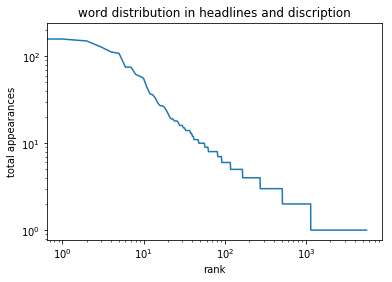

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([vocabcount[w] for w in vocab]);
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('word distribution in headlines and discription')
plt.xlabel('rank')
plt.ylabel('total appearances');

## Index Words


In [44]:
empty = 0 # RNN mask of no data
eos = 1  # end of sentence
start_idx = eos+1 # first real word

In [47]:
def get_idx(vocab, vocabcount):
    word2idx = dict((word, idx+start_idx) for idx,word in enumerate(vocab))
    word2idx['<empty>'] = empty
    word2idx['<eos>'] = eos
    
    idx2word = dict((idx,word) for word,idx in word2idx.items())

    return word2idx, idx2word

In [48]:
word2idx, idx2word = get_idx(vocab, vocabcount)


## Word Embedding

In [6]:
fname = 'glove.6B.txt'
import os
from keras.utils.data_utils import get_file
datadir_base = os.path.expanduser(os.path.join('~', '.keras'))
if not os.access(datadir_base, os.W_OK):
    datadir_base = os.path.join('/tmp', '.keras')
datadir = os.path.join(datadir_base, 'datasets')
glove_name = os.path.join(datadir, fname)
if not os.path.exists(glove_name):
    path = 'glove.6B.zip'
    path = get_file(path, origin="http://nlp.stanford.edu/data/glove.6B.zip")
    !unzip {datadir}/{path}

862183424/862182613 [==============================] - 3437s 4us/step
unzip:  cannot find or open /home/kaushik/.keras/datasets//home/kaushik/.keras/datasets/glove.6B.zip, /home/kaushik/.keras/datasets//home/kaushik/.keras/datasets/glove.6B.zip.zip or /home/kaushik/.keras/datasets//home/kaushik/.keras/datasets/glove.6B.zip.ZIP.
